<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_1_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.415506,69.257649,32.079753,-0.000771,180.752137,180.752649,-0.000511
1,0.0,1.0,56.884536,81.569524,84.880765,-0.000399,233.334427,233.335030,-0.000603
2,0.0,2.0,69.746661,46.342689,38.376762,0.001359,164.467470,164.465916,0.001554
3,0.0,3.0,21.572254,56.261720,57.424182,-0.001686,145.256470,145.257379,-0.000909
4,0.0,4.0,27.503466,76.085091,40.070345,-0.001200,153.657702,153.658027,-0.000325
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,44.337831,42.017322,49.448833,-0.003013,145.800974,145.803494,-0.002520
119996,999.0,116.0,97.878632,43.331375,23.624147,0.000309,174.834463,174.834696,-0.000233
119997,999.0,117.0,47.957029,26.283680,56.055807,-0.001552,140.294964,140.295639,-0.000675
119998,999.0,118.0,71.655191,75.128027,75.754944,-0.000032,232.538129,232.538462,-0.000333


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.415506  69.257649  32.079753  ...  180.752137  180.752649 -0.000511
      1.0    56.884536  81.569524  84.880765  ...  233.334427  233.335030 -0.000603
      2.0    69.746661  46.342689  38.376762  ...  164.467470  164.465916  0.001554
      3.0    21.572254  56.261720  57.424182  ...  145.256470  145.257379 -0.000909
      4.0    27.503466  76.085091  40.070345  ...  153.657702  153.658027 -0.000325
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  44.337831  42.017322  49.448833  ...  145.800974  145.803494 -0.002520
      116.0  97.878632  43.331375  23.624147  ...  174.834463  174.834696 -0.000233
      117.0  47.957029  26.283680  56.055807  ...  140.294964  140.295639 -0.000675
      118.0  71.655191  75.128027  75.754944  ...  232.538129  232.538462 -0.000333
      119.0  23.409765  81.541294  40.880330  ...  155.831190  155.831613 -0.000423

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.415506  69.257649  32.079753  ...  180.752137  180.752649 -0.000511
      1.0    56.884536  81.569524  84.880765  ...  233.334427  233.335030 -0.000603
      2.0    69.746661  46.342689  38.376762  ...  164.467470  164.465916  0.001554
      3.0    21.572254  56.261720  57.424182  ...  145.256470  145.257379 -0.000909
      4.0    27.503466  76.085091  40.070345  ...  153.657702  153.658027 -0.000325
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  44.337831  42.017322  49.448833  ...  145.800974  145.803494 -0.002520
      116.0  97.878632  43.331375  23.624147  ...  174.834463  174.834696 -0.000233
      117.0  47.957029  26.283680  56.055807  ...  140.294964  140.295639 -0.000675
      118.0  71.655191  75.128027  75.754944  ...  232.538129  232.538462 -0.000333
      119.0  23.409765  81.541294  40.880330  ...  155.831190  155.831613 -0.000423

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.415506,69.257649,32.079753,-0.000771,180.752137,180.752649,-0.000511
1,0.0,1.0,56.884536,81.569524,84.880765,-0.000399,233.334427,233.335030,-0.000603
2,0.0,2.0,69.746661,46.342689,38.376762,0.001359,164.467470,164.465916,0.001554
3,0.0,3.0,21.572254,56.261720,57.424182,-0.001686,145.256470,145.257379,-0.000909
4,0.0,4.0,27.503466,76.085091,40.070345,-0.001200,153.657702,153.658027,-0.000325
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,44.337831,42.017322,49.448833,-0.003013,145.800974,145.803494,-0.002520
119996,999.0,116.0,97.878632,43.331375,23.624147,0.000309,174.834463,174.834696,-0.000233
119997,999.0,117.0,47.957029,26.283680,56.055807,-0.001552,140.294964,140.295639,-0.000675
119998,999.0,118.0,71.655191,75.128027,75.754944,-0.000032,232.538129,232.538462,-0.000333


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.415506  69.257649  32.079753  ...  180.752137  180.752649 -0.000511
      1.0    56.884536  81.569524  84.880765  ...  233.334427  233.335030 -0.000603
      2.0    69.746661  46.342689  38.376762  ...  164.467470  164.465916  0.001554
      3.0    21.572254  56.261720  57.424182  ...  145.256470  145.257379 -0.000909
      4.0    27.503466  76.085091  40.070345  ...  153.657702  153.658027 -0.000325
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  44.337831  42.017322  49.448833  ...  145.800974  145.803494 -0.002520
      116.0  97.878632  43.331375  23.624147  ...  174.834463  174.834696 -0.000233
      117.0  47.957029  26.283680  56.055807  ...  140.294964  140.295639 -0.000675
      118.0  71.655191  75.128027  75.754944  ...  232.538129  232.538462 -0.000333
      119.0  23.409765  81.541294  40.880330  ...  155.831190  155.831613 -0.000423

[120000 rows x 7 columns]

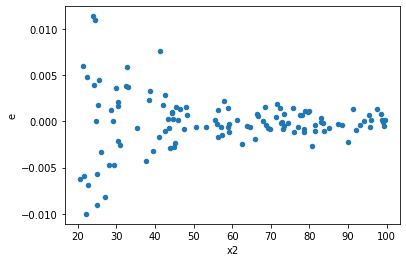

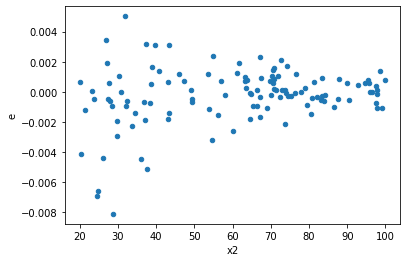

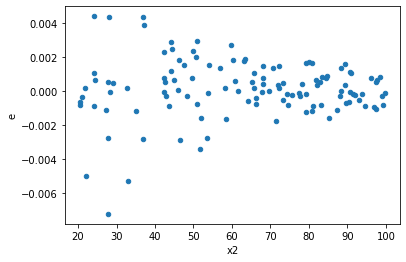

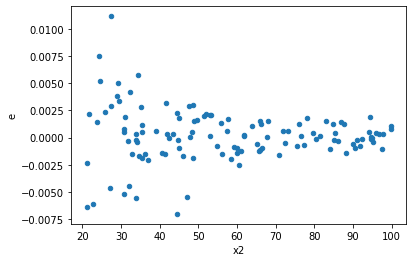

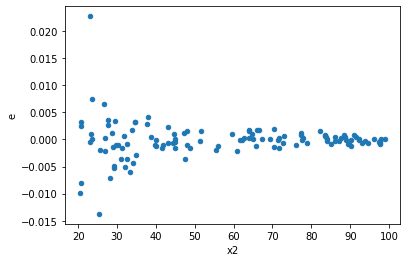

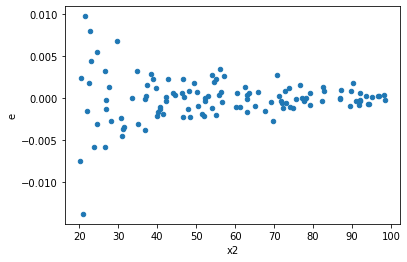

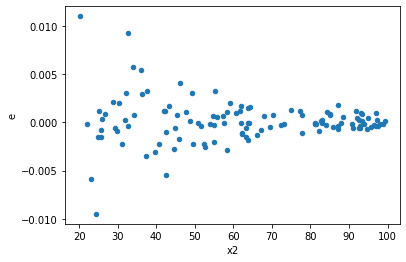

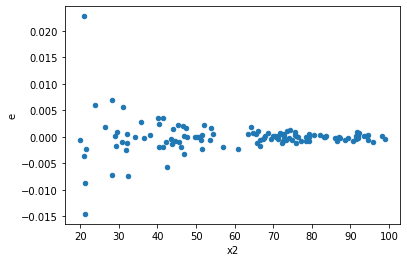

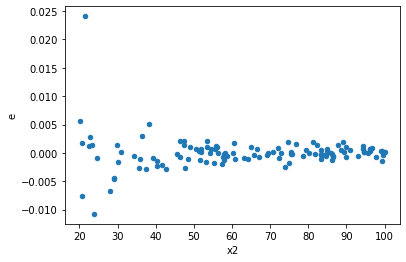

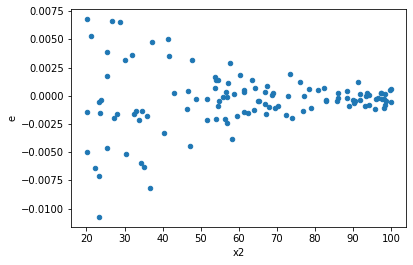

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,53.0,61.0,5.8659584778470434e-05,0.0009826326685844812,1.1280689380475084e-06,1.6377211143074686e-05,14.554532113272305,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
1.0,48.0,66.0,0.0001454214160583827,0.0002556604359383912,3.094072682093249e-06,3.933237475975249e-06,1.278593398004049,0.37295878849062936,0.8135206057546853,Reject001=1 : Homoscedasticity
3.0,60.0,54.0,0.0002320355945390528,0.00044890088931817483,3.932806687102589e-06,8.469828100342921e-06,2.149578675202507,0.004213925612592151,0.9978930371937039,Reject001=0 : Heteroscedasticity
4.0,57.0,57.0,4.046200608524637e-05,0.0013190039120658562,7.22535822950828e-07,2.355364128689029e-05,32.59857925202586,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
5.0,60.0,54.0,0.00020347549147058772,0.0006265557666152253,3.4487371435692835e-06,1.1821806917268401e-05,3.421409964342307,5.819885036117967e-06,0.9999970900574819,Reject001=0 : Heteroscedasticity
6.0,58.0,56.0,4.492805561069648e-05,0.0005762051226458721,7.882115019420435e-07,1.0476456775379493e-05,13.28310047951417,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
7.0,58.0,56.0,0.00017717083403272227,0.0010069545149840443,3.10826024618811e-06,1.8308263908800807e-05,5.8865059925205,2.615845318132415e-10,0.9999999998692077,Reject001=0 : Heteroscedasticity
8.0,47.0,67.0,0.00015391381662948245,0.0008566060230598839,3.3459525354235314e-06,1.2978879137270967e-05,3.9041506848004635,2.832727560297954e-06,0.9999985836362199,Reject001=0 : Heteroscedasticity
9.0,61.0,53.0,6.274047381150851e-05,0.0007577625646955189,1.045674563525142e-06,1.4572357013375364e-05,13.900784720945504,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,53.0,61.0,5.8659584778470434e-05,0.0009826326685844812,1.1280689380475084e-06,1.6377211143074686e-05,14.554532113272305,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,48.0,66.0,0.0001454214160583827,0.0002556604359383912,3.094072682093249e-06,3.933237475975249e-06,1.278593398004049,0.37295878849062936,Reject001=1 : Homoscedasticity
2.0,52.0,62.0,0.0001692972576832337,0.00015429567796140234,3.3195540722202686e-06,2.5294373436295466e-06,0.7643908711878942,0.3095682843000482,Reject001=1 : Homoscedasticity
3.0,60.0,54.0,0.0002320355945390528,0.00044890088931817483,3.932806687102589e-06,8.469828100342921e-06,2.149578675202507,0.004213925612592151,Reject001=0 : Heteroscedasticity
4.0,57.0,57.0,4.046200608524637e-05,0.0013190039120658562,7.22535822950828e-07,2.355364128689029e-05,32.59857925202586,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,60.0,54.0,0.00020347549147058772,0.0006265557666152253,3.4487371435692835e-06,1.1821806917268401e-05,3.421409964342307,5.819885036117967e-06,Reject001=0 : Heteroscedasticity
6.0,58.0,56.0,4.492805561069648e-05,0.0005762051226458721,7.882115019420435e-07,1.0476456775379493e-05,13.28310047951417,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,58.0,56.0,0.00017717083403272227,0.0010069545149840443,3.10826024618811e-06,1.8308263908800807e-05,5.8865059925205,2.615845318132415e-10,Reject001=0 : Heteroscedasticity
8.0,47.0,67.0,0.00015391381662948245,0.0008566060230598839,3.3459525354235314e-06,1.2978879137270967e-05,3.9041506848004635,2.832727560297954e-06,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    605
Reject001=1 : Homoscedasticity      395
Name: Result_test, dtype: int64